# Hyperopt
mainly from [here](https://vooban.com/en/tips-articles-geek-stuff/hyperopt-tutorial-for-optimizing-neural-networks-hyperparameters/)

In [1]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials

In [2]:
def objective(x):
    return {'loss': x ** 2, 'status': STATUS_OK }

best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

print(best)

{'x': 0.0025952865807196135}


In [2]:

def objective(x):
    return {
        'loss': x ** 2,
        'status': STATUS_OK,
        # -- store other results like this
        'eval_time': time.time(),
        'other_stuff': {'type': None, 'value': [0, 1, 2]},
        # -- attachments are handled differently
        'attachments':
            {'time_module': pickle.dumps(time.time)}
        }
trials = Trials()
best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)

{'x': 0.029160545142388847}


In [51]:
from hyperopt import pyll, hp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.kde import gaussian_kde
%matplotlib inline

In [36]:
# Let's plot the result of sampling from many different probability distributions:
hyperparam_generators = {
    'randint': hp.randint('randint', 5),
    'uniform': hp.uniform('uniform', -1, 3),
    'loguniform': hp.loguniform('loguniform', -0.3, 0.3),
    'normal': hp.normal('normal', 1, 2),
    'lognormal': hp.lognormal('lognormal', 0, 0.3)
}

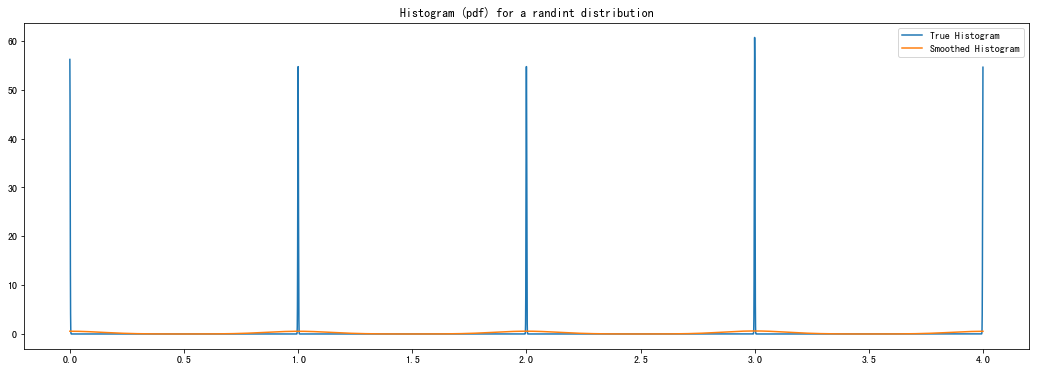

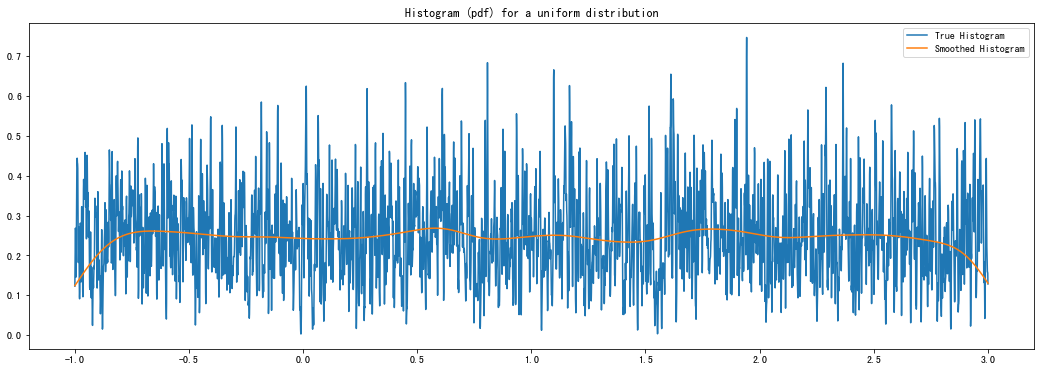

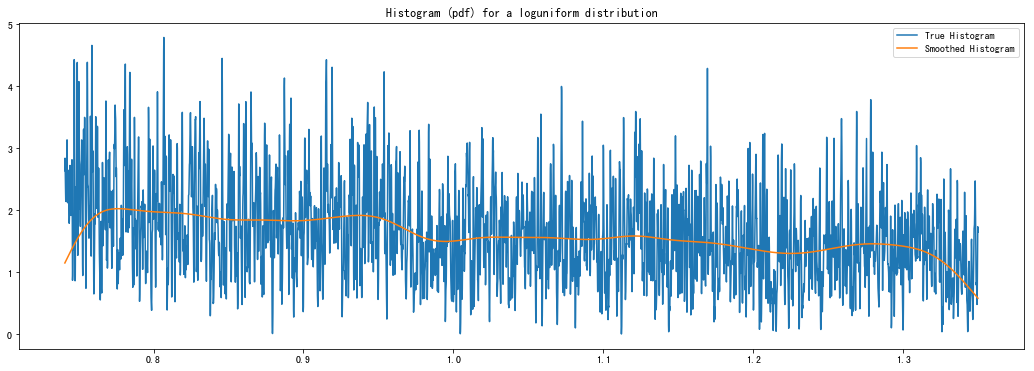

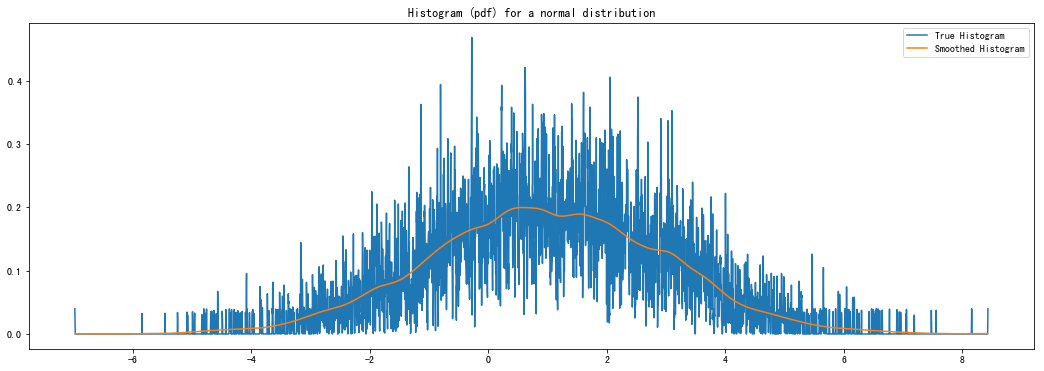

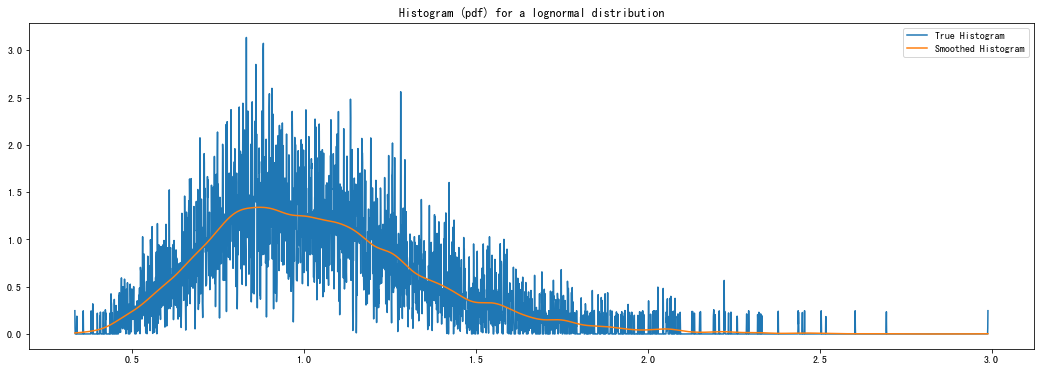

In [52]:
n_samples = 5000
for title, space in hyperparam_generators.items():
    evaluated = [
        pyll.stochastic.sample(space) for _ in range(n_samples)
    ]
    x_domain = np.linspace(min(evaluated), max(evaluated), n_samples)
    plt.figure(figsize=(18,6))
    hist = gaussian_kde(evaluated, 0.001)
    plt.plot(x_domain, hist(x_domain), label="True Histogram")
    
    blurred_hist = gaussian_kde(evaluated, 0.1)
    plt.plot(x_domain, blurred_hist(x_domain), label="Smoothed Histogram")

    plt.title("Histogram (pdf) for a {} distribution".format(title))
    plt.legend()
    

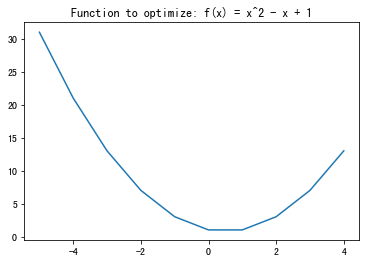

Found minimum after 1000 trials:
{'x': 0.0}


In [59]:
from hyperopt import fmin, tpe, hp
import matplotlib.pyplot as plt

def f(x):
    return x**2 - x + 1

plt.plot(range(-5, 5), [f(x) for x in range(-5, 5)])
plt.title("Function to optimize: f(x) = x^2 - x + 1")
plt.show()

space = hp.uniform('x', -5, 5)

best = fmin(
    fn=f,  # "Loss" function to minimize
    space=space,  # Hyperparameter space
    algo=tpe.suggest,  # Tree-structured Parzen Estimator (TPE)
    max_evals=1000  # Perform 1000 trials
)

print("Found minimum after 1000 trials:")
print(best)

In [60]:

import pprint

pp = pprint.PrettyPrinter(indent=4, width=100)

# Define a complete space: 
space = {
    'x': hp.normal('x', 0, 2),
    'y': hp.uniform('y', 0, 1),
    'use_float_param_or_not': hp.choice('use_float_param_or_not', [
        None, hp.uniform('float', 0, 1),
    ]),
    'my_abc_other_params_list': [
        hp.normal('a', 0, 2), hp.uniform('b', 0, 3), hp.choice('c', [False, True]),
    ],
    'yet_another_dict_recursive': {
        'u': hp.uniform('u', 0, 3),
        'v': hp.uniform('v', 0, 3),
        'u': hp.uniform('w', -3, 0)
    }
}

# Print a few random (stochastic) samples from the space: 
for _ in range(10):
    pp.pprint(pyll.stochastic.sample(space))

{   'my_abc_other_params_list': (-0.47189450218353357, 2.439806156263309, True),
    'use_float_param_or_not': 0.6851197833394044,
    'x': -2.179555749880904,
    'y': 0.1801057305579099,
    'yet_another_dict_recursive': {'u': -0.8899973738000195, 'v': 0.20834745682986455}}
{   'my_abc_other_params_list': (-0.984651692677163, 1.2899730029134946, False),
    'use_float_param_or_not': None,
    'x': -1.8073788326300955,
    'y': 0.20392318093260975,
    'yet_another_dict_recursive': {'u': -0.38727433859457205, 'v': 2.7423760726851767}}
{   'my_abc_other_params_list': (1.3987696093576476, 0.4868965753696527, False),
    'use_float_param_or_not': None,
    'x': -1.0961333784519025,
    'y': 0.8603622355838847,
    'yet_another_dict_recursive': {'u': -0.3055853195892917, 'v': 1.3241439835596953}}
{   'my_abc_other_params_list': (-1.58406282182048, 2.2470701031100826, True),
    'use_float_param_or_not': None,
    'x': 0.5692745599172733,
    'y': 0.48852464374135374,
    'yet_another_dict

# records history

In [61]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL

import pprint

pp = pprint.PrettyPrinter(indent=4)

def f(space):
    x = space['x']
    y = space['y']

    if y > 1:
        # Make use of status fail as an example of skipping on error
        result = {
            "loss": -1,
            "status": STATUS_FAIL,
            "space": space
        }
        return result

    loss = x**2 + y**2
    result = {
        "loss": loss,
        "status": STATUS_OK,
        "space": space
    }
    return result

space = {
    'x': hp.uniform('x', -5, 5),
    'y': hp.uniform('y', -5, 5)
}

trials = Trials()

best = fmin(
    fn=f,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    max_evals=1000
)

print("Found minimum after 1000 trials:")
print(best)
print("")

print("Here are the space and results of the 3 first trials (out of a total of 1000):")
pp.pprint(trials.trials[0])
pp.pprint(trials.trials[1])
pp.pprint(trials.trials[2])
# pp.pprint(trials.trials[...])
# pp.pprint(trials.trials[999])
print("")

print("What interests us most is the 'result' key of each trial (here, we show 7):")
pp.pprint(trials.trials[0]["result"])
pp.pprint(trials.trials[1]["result"])
pp.pprint(trials.trials[2]["result"])
pp.pprint(trials.trials[3]["result"])
pp.pprint(trials.trials[4]["result"])
pp.pprint(trials.trials[5]["result"])
pp.pprint(trials.trials[6]["result"])
# pp.pprint(trials.trials[...]["result"])
# pp.pprint(trials.trials[999]["result"])


Found minimum after 1000 trials:
{'x': 0.10956634698577972, 'y': -0.11416868321281459}

Here are the space and results of the 3 first trials (out of a total of 1000):
{   'book_time': datetime.datetime(2018, 2, 6, 14, 40, 11, 804000),
    'exp_key': None,
    'misc': {   'cmd': ('domain_attachment', 'FMinIter_Domain'),
                'idxs': {'x': [0], 'y': [0]},
                'tid': 0,
                'vals': {'x': [3.3914725206909964], 'y': [-2.0225464950996996]},
                'workdir': None},
    'owner': None,
    'refresh_time': datetime.datetime(2018, 2, 6, 14, 40, 11, 804000),
    'result': {   'loss': 15.59278018344222,
                  'space': {'x': 3.3914725206909964, 'y': -2.0225464950996996},
                  'status': 'ok'},
    'spec': None,
    'state': 2,
    'tid': 0,
    'version': 0}
{   'book_time': datetime.datetime(2018, 2, 6, 14, 40, 11, 806000),
    'exp_key': None,
    'misc': {   'cmd': ('domain_attachment', 'FMinIter_Domain'),
                'idxs'